In [1]:
from pathlib import Path
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
df=pd.read_csv(os.path.abspath("virufy-data-main/clinical/noise_added_dataset.csv"))

In [3]:
#Recup mp3 a partir du csv
dfcough=df['subname']
path=os.path.abspath('virufy-data-main/clinical/segmented/modified_merged')
X0 = df.drop(columns=['corona_test', 'cough_filename', 'subname', 'date'])
X0.head()

,age,gender,medical_history,smoker,patient_reported_symptoms,has_Covid19
0,24.0,female,"none,",no,"New or worsening cough,",0.0
1,24.0,female,"none,",no,"New or worsening cough,",0.0
2,24.0,female,"none,",no,"New or worsening cough,",0.0
3,37.0,male,"none,",no,"none,",0.0
4,37.0,male,"none,",no,"none,",0.0


In [4]:
#iterate trhough all data

maxmfcc=[]
minmfcc=[]
meanmfcc=[]
stdmfcc=[]
rangemfcc=[]

maxmagspec=[]
minreg=[]
meanmagspec=[]
meanreg=[]
maxfreqmagspec=[]
maxfreqreg=[]
maxfreqfft=[]

for i in range(len(dfcough)):
    data,sr=librosa.load(os.path.abspath(path +'/'+ dfcough[i]), res_type='kaiser_fast', duration=1, mono=True)
    
    data_fft=np.fft.fft(data)
    magnitude_spectrum=np.abs(data_fft)
    maxmagspec.append(magnitude_spectrum.max())
    minreg.append(data.min())
    meanmagspec.append(magnitude_spectrum.mean())
    meanreg.append(data.mean())
 
    maxfreqmagspec.append(np.argmax(magnitude_spectrum))
    maxfreqreg.append(np.argmax(data))
    maxfreqfft.append(np.argmax(data_fft))
    
    # calcul du mfcc moyen sur 128 tronçons
    mfccs = np.mean(librosa.feature.mfcc(y=data, sr=sr, n_mfcc=128).T,axis=0)
    
    maxmfcc.append(max(mfccs))
    minmfcc.append(min(mfccs))
    meanmfcc.append(mfccs.mean())
    stdmfcc.append(np.std(mfccs))
    rangemfcc.append(max(mfccs)-min(mfccs))


d={'maxmfcc':maxmfcc, 'minmfcc':minmfcc, 'meanmfcc':meanmfcc,'stdmfcc':stdmfcc, 'rangemfcc':rangemfcc,
   'maxmagspec':maxmagspec,'minreg': minreg,'meanmagspec':meanmagspec,'meanreg':meanreg,'maxfreqmagspec':maxfreqmagspec,
   'maxfreqreg':maxfreqreg,'maxfreqfft':maxfreqfft}




C:\Users\adrie\anaconda3\lib\site-packages\librosa\core\audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
C:\Users\adrie\anaconda3\lib\site-packages\librosa\core\audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In [5]:
df2=pd.DataFrame(data=d)
df2.head()

,maxmfcc,minmfcc,meanmfcc,stdmfcc,rangemfcc,maxmagspec,minreg,meanmagspec,meanreg,maxfreqmagspec,maxfreqreg,maxfreqfft
0,54.605576,-438.285767,-4.036503,39.253922,492.891357,106.018880,-0.585769,5.444349,0.000002,1478,424,20586
1,55.400497,-381.640991,-3.347221,34.285961,437.041504,139.283694,-0.679557,6.313174,0.000012,696,203,20537
2,61.448055,-399.955261,-3.717962,36.064163,461.403320,111.805578,-0.683689,8.104930,0.000128,1784,214,611
3,62.597389,-450.439728,-3.896398,40.213867,513.037109,102.664317,-0.709709,4.206902,-0.000098,330,738,21720
4,57.859745,-501.784760,-4.132426,44.549824,559.644531,155.310554,-0.744767,3.135501,0.000064,271,249,21780


In [6]:
X1=pd.concat([X0,df2],axis=1)
X1=X1.drop(columns=['has_Covid19'])

X2=pd.concat([X0,df2],axis=1)
X2.head()

,age,gender,medical_history,smoker,patient_reported_symptoms,has_Covid19,maxmfcc,minmfcc,meanmfcc,stdmfcc,rangemfcc,maxmagspec,minreg,meanmagspec,meanreg,maxfreqmagspec,maxfreqreg,maxfreqfft
0,24.0,female,"none,",no,"New or worsening cough,",0.0,54.605576,-438.285767,-4.036503,39.253922,492.891357,106.018880,-0.585769,5.444349,0.000002,1478,424,20586
1,24.0,female,"none,",no,"New or worsening cough,",0.0,55.400497,-381.640991,-3.347221,34.285961,437.041504,139.283694,-0.679557,6.313174,0.000012,696,203,20537
2,24.0,female,"none,",no,"New or worsening cough,",0.0,61.448055,-399.955261,-3.717962,36.064163,461.403320,111.805578,-0.683689,8.104930,0.000128,1784,214,611
3,37.0,male,"none,",no,"none,",0.0,62.597389,-450.439728,-3.896398,40.213867,513.037109,102.664317,-0.709709,4.206902,-0.000098,330,738,21720
4,37.0,male,"none,",no,"none,",0.0,57.859745,-501.784760,-4.132426,44.549824,559.644531,155.310554,-0.744767,3.135501,0.000064,271,249,21780


Index(['age', 'has_Covid19', 'maxmfcc', 'minmfcc', 'meanmfcc', 'stdmfcc',
       'rangemfcc', 'maxmagspec', 'minreg', 'meanmagspec', 'meanreg',
       'maxfreqmagspec', 'maxfreqreg', 'maxfreqfft'],
      dtype='object')


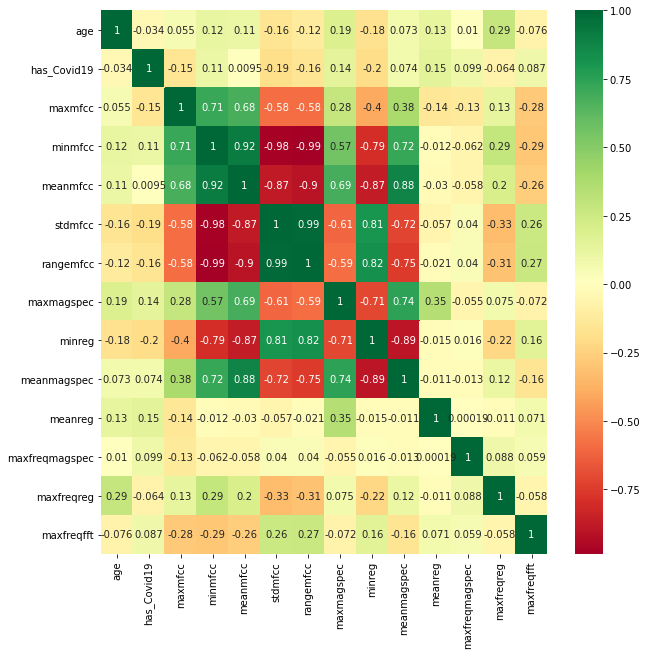

In [7]:
#get correlations of each features in dataset
# pensez à inclure le label au dataset
# il faut utiliser des valeurs numériques
import seaborn as sns
corrmat = X2.corr()
top_corr_features = corrmat.index
print(top_corr_features)
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(X2[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [8]:
# X getting rid of useless parameters higly correlated to each others
X=X1.drop(columns=['minmfcc', 'meanmfcc','rangemfcc'])
X.head()

,age,gender,medical_history,smoker,patient_reported_symptoms,maxmfcc,stdmfcc,maxmagspec,minreg,meanmagspec,meanreg,maxfreqmagspec,maxfreqreg,maxfreqfft
0,24.0,female,"none,",no,"New or worsening cough,",54.605576,39.253922,106.018880,-0.585769,5.444349,0.000002,1478,424,20586
1,24.0,female,"none,",no,"New or worsening cough,",55.400497,34.285961,139.283694,-0.679557,6.313174,0.000012,696,203,20537
2,24.0,female,"none,",no,"New or worsening cough,",61.448055,36.064163,111.805578,-0.683689,8.104930,0.000128,1784,214,611
3,37.0,male,"none,",no,"none,",62.597389,40.213867,102.664317,-0.709709,4.206902,-0.000098,330,738,21720
4,37.0,male,"none,",no,"none,",57.859745,44.549824,155.310554,-0.744767,3.135501,0.000064,271,249,21780


In [9]:
#transform categorical in numerical params
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
X['gender'] = le.fit_transform(X['gender'])
X['smoker'] = le.fit_transform(X['smoker'])

X.head()

,age,gender,medical_history,smoker,patient_reported_symptoms,maxmfcc,stdmfcc,maxmagspec,minreg,meanmagspec,meanreg,maxfreqmagspec,maxfreqreg,maxfreqfft
0,24.0,0,"none,",0,"New or worsening cough,",54.605576,39.253922,106.018880,-0.585769,5.444349,0.000002,1478,424,20586
1,24.0,0,"none,",0,"New or worsening cough,",55.400497,34.285961,139.283694,-0.679557,6.313174,0.000012,696,203,20537
2,24.0,0,"none,",0,"New or worsening cough,",61.448055,36.064163,111.805578,-0.683689,8.104930,0.000128,1784,214,611
3,37.0,1,"none,",0,"none,",62.597389,40.213867,102.664317,-0.709709,4.206902,-0.000098,330,738,21720
4,37.0,1,"none,",0,"none,",57.859745,44.549824,155.310554,-0.744767,3.135501,0.000064,271,249,21780


In [10]:
#replace medical history's categorical values by numeric ones
'''
none=0
Diabetes with complications=1
Asthma or chronic lung disease=2
Congestive heart failure=3
'''
for i in range(len(X['medical_history'])):
    if X['medical_history'][i] in 'Diabetes with complications,':
        X['medical_history'][i]=1
    elif X['medical_history'][i] in 'Asthma or chronic lung disease,':
        X['medical_history'][i]=2
    elif X['medical_history'][i] in 'Congestive heart failure,':
        X['medical_history'][i]=3
    else:
        X['medical_history'][i]=0

<ipython-input-10-1c681feb548c>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['medical_history'][i]=0
<ipython-input-10-1c681feb548c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['medical_history'][i]=1
<ipython-input-10-1c681feb548c>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['medical_history'][i]=2
<ipython-input-10-1c681feb548c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

In [11]:
#replace patient_reported_symptoms' categorical values by numeric ones
'''
none,=0
New or worsening cough,=1
Sore throat,=2
Shortness of breath,=3
Shortness of breath, Sore throat, Body aches,=4
Shortness of breath, New or worsening cough,=5
Sore throat,Loss of taste,Loss of smell,=6
Fever, chills, or sweating,New or worsening cough,Sore throat,=7
Fever, chills, or sweating,Shortness of breath,New or worsening cough,Sore throat,Loss of taste,Loss of smell,=8
'''
for i in range(len(X['medical_history'])):
    if X['patient_reported_symptoms'][i] == 'New or worsening cough,':
        X['patient_reported_symptoms'][i]=1
    elif X['patient_reported_symptoms'][i] == 'Sore throat,':
        X['patient_reported_symptoms'][i]=2
    elif X['patient_reported_symptoms'][i] == 'Shortness of breath,':
        X['patient_reported_symptoms'][i]=3
    elif X['patient_reported_symptoms'][i] == 'Shortness of breath, Sore throat, Body aches,':
        X['patient_reported_symptoms'][i]=4
    elif X['patient_reported_symptoms'][i] == 'Shortness of breath, New or worsening cough,':
        X['patient_reported_symptoms'][i]=5
    elif X['patient_reported_symptoms'][i] == 'Sore throat,Loss of taste,Loss of smell,':
        X['patient_reported_symptoms'][i]=6
    elif X['patient_reported_symptoms'][i] == 'Fever, chills, or sweating,New or worsening cough,Sore throat,':
        X['patient_reported_symptoms'][i]=7
    elif X['patient_reported_symptoms'][i] == 'Fever, chills, or sweating,Shortness of breath,New or worsening cough,Sore throat,Loss of taste,Loss of smell,':
        X['patient_reported_symptoms'][i]=8
    else:
        X['patient_reported_symptoms'][i]=0

<ipython-input-11-74f5a0b1cb05>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['patient_reported_symptoms'][i]=1
<ipython-input-11-74f5a0b1cb05>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['patient_reported_symptoms'][i]=0
<ipython-input-11-74f5a0b1cb05>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['patient_reported_symptoms'][i]=7
<ipython-input-11-74f5a0b1cb05>:29: SettingWithCopyWarning: 
A value is trying to be 

In [12]:
X.describe()

,age,gender,smoker,maxmfcc,stdmfcc,maxmagspec,minreg,meanmagspec,meanreg,maxfreqmagspec,maxfreqreg,maxfreqfft
count,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000
mean,48.234043,0.726950,0.308511,95.134759,24.506195,498.642333,-0.882874,16.800306,0.000172,4117.297872,3316.514184,9728.833333
std,13.264695,0.446318,0.462700,31.735976,9.663539,466.314237,0.243280,15.950585,0.003999,7377.562307,3388.254867,9523.019256
min,17.000000,0.000000,0.000000,33.536617,7.708642,64.399178,-1.505321,1.444179,-0.016149,57.000000,1.000000,70.000000
25%,40.000000,0.000000,0.000000,67.076260,16.080079,191.751261,-1.054151,5.458705,-0.000274,220.000000,365.000000,268.250000
50%,53.000000,1.000000,0.000000,92.676556,21.454546,295.722924,-0.792790,8.553219,-0.000032,327.000000,2017.000000,9837.000000
75%,53.000000,1.000000,1.000000,118.957033,34.059418,771.388772,-0.692299,24.601544,0.000129,1419.500000,5556.500000,21562.250000
max,66.000000,1.000000,1.000000,166.447388,44.549824,3117.532879,-0.209591,64.062827,0.023085,21821.000000,18516.000000,21837.000000


In [13]:
#scaling params having negative values (meanreg, minreg) to use SelectKBest 
from sklearn.preprocessing import MinMaxScaler
scaler = min_max_scaler = MinMaxScaler()

X[["meanreg", "minreg"]] = min_max_scaler.fit_transform(X[["meanreg", "minreg"]])

In [16]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# on va rechercher les paramètres les plus importants via la méthode SelectKBest

y = df['has_Covid19']
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k="all")

fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(14,'Score'))  #print features sorted by best first

                        Specs         Score
11             maxfreqmagspec  36111.315037
13                 maxfreqfft  19798.384858
12                 maxfreqreg   3994.150578
7                  maxmagspec   2525.063829
4   patient_reported_symptoms    286.752161
2             medical_history    156.461491
3                      smoker     89.503597
5                     maxmfcc     66.110739
6                     stdmfcc     39.798276
9                 meanmagspec     23.023928
0                         age      1.184828
1                      gender      0.943736
8                      minreg      0.805246
10                    meanreg      0.160775


In [17]:
# X getting rid of non significant params in X
X_bestK=X.drop(columns=['minreg', 'meanreg','gender','age'])

In [18]:
# using PCA to reduce dimensions down to 5
#result is not so good so we won't use it
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
data_pca = pca.fit_transform(X)

# Turn to DataFrame
Xpca = pd.DataFrame(data_pca,columns=['PC1','PC2','PC3','PC4','PC5'])

In [20]:
#split train/test sets
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X_bestK,y,test_size=0.2,random_state=78) #test=20% of total data

In [21]:
#Model SVC
from sklearn import svm

modelsvm=svm.NuSVC()
modelsvm.fit(x_train,y_train)
y_pred=modelsvm.predict(x_test)
print(modelsvm.score(x_train,y_train))
print(modelsvm.score(x_test,y_test))

0.6977777777777778
0.5263157894736842


In [22]:
#Model SVC crossval
from sklearn.model_selection import cross_val_score

SVC_cvs = cross_val_score(modelsvm, x_train, y_train, cv=10, scoring='accuracy').mean()
print(cross_val_score(modelsvm, x_train, y_train, cv=10, scoring='accuracy'))
print(SVC_cvs)

[0.56521739 0.60869565 0.60869565 0.56521739 0.60869565 0.63636364
 0.59090909 0.90909091 0.40909091 0.54545455]
0.6047430830039525


In [23]:
#Model Knn Classifier
from sklearn.neighbors import KNeighborsClassifier

modelknn=KNeighborsClassifier(n_neighbors=7, metric='euclidean')
modelknn.fit(x_train,y_train)
y_predknn=modelknn.predict(x_test)
print(modelknn.score(x_train,y_train))
print(modelknn.score(x_test,y_test))

0.76
0.6140350877192983


[0.65217391 0.56521739 0.82608696 0.73913043 0.52173913 0.72727273
 0.63636364 0.72727273 0.63636364 0.68181818]
0.6713438735177866


C:\Users\adrie\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass param_name=n_neighbors, param_range=[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


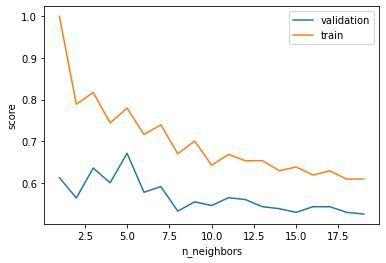

In [24]:
#Model KNN crossval
from sklearn.model_selection import cross_val_score
KNN_cvs = cross_val_score(KNeighborsClassifier(), x_train, y_train, cv=10, scoring='accuracy').mean()
print(cross_val_score(KNeighborsClassifier(), x_train, y_train, cv=10, scoring='accuracy'))
print(KNN_cvs)

#validation curve
from sklearn.model_selection import validation_curve
k = np.arange(1, 20)
train_score, val_score = validation_curve(KNeighborsClassifier(metric='euclidean'), x_train, y_train, 'n_neighbors', k, cv=10)

#visualize the best k for n_neighbors
plt.plot(k,val_score.mean(axis=1), label='validation')
plt.plot(k,train_score.mean(axis=1), label='train')
plt.ylabel('score')
plt.xlabel('n_neighbors')
plt.legend()

In [25]:
#gridSearchCV permet de rechercher les meilleurs hyperparamètres pour notre modèle
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': np.arange(1,20),'metric':['euclidean', 'manhattan']}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10)
grid.fit(x_train, y_train)
print(grid.best_score_) # meilleur score sur les données de validation
print(grid.best_params_) # meilleurs paramètres
modelknngrid = grid.best_estimator_ #attribuer le modèle et ses meilleurs hyperparamètres à une variable
modelknngrid.score(x_test,y_test) # essai avec les données de test

0.6713438735177866
{'metric': 'euclidean', 'n_neighbors': 5}


0.6842105263157895

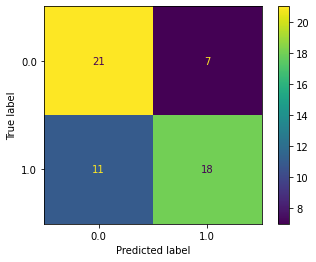

In [26]:
#show confusion matrix for testset
# indépendamment du score, les erreurs de diagnostics du type false negative sont particulièrement mauvaises
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(modelknngrid, x_test, y_test)  
plt.show() 

[ 40  80 121 161 202]


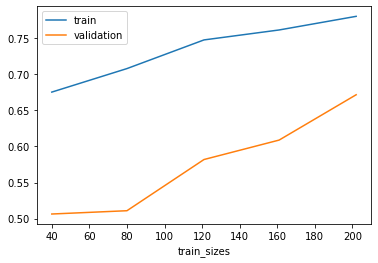

In [27]:
# le learning rate va nous permettre de voir s'il serait intéressant de récolter plus de données
# si nos courbes tendent vers une valeur fixe alors c'est le cas
#ici la courbe continue d'augmenter, + de données donnerait alors un modèle plus performant

from sklearn.model_selection import learning_curve

N, train_score_lc, val_score_lc = learning_curve(modelknngrid, x_train, y_train, train_sizes=np.linspace(0.2, 1.0, 5), cv=10)

print(N)
plt.plot(N,train_score_lc.mean(axis=1), label='train')
plt.plot(N,val_score_lc.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()

In [28]:
#Model DecisionTreeClassfier
from sklearn.tree import DecisionTreeClassifier

modeltree=DecisionTreeClassifier(max_depth=3,random_state=0)
modeltree.fit(x_train,y_train)
y_predtree=modeltree.predict(x_test)
print(modeltree.score(x_train,y_train))
print(modeltree.score(x_test,y_test))

0.9333333333333333
0.8421052631578947


[0.86956522 0.91304348 0.86956522 0.86956522 0.95652174 1.
 0.95454545 0.90909091 0.81818182 0.81818182]
0.924703557312253


C:\Users\adrie\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass param_name=max_depth, param_range=[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


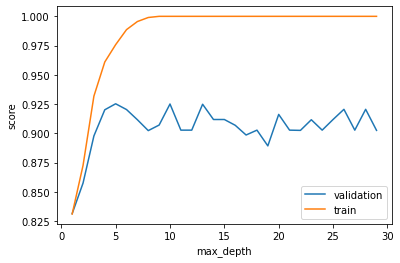

In [44]:
#Model decision tree crossval
from sklearn.model_selection import cross_val_score
tree_cvs = cross_val_score(DecisionTreeClassifier(), x_train, y_train, cv=10, scoring='accuracy').mean()
print(cross_val_score(modeltree, x_train, y_train, cv=10, scoring='accuracy'))
print(tree_cvs)

#validation curve
from sklearn.model_selection import validation_curve
k = np.arange(1, 30)
train_score, val_score = validation_curve(DecisionTreeClassifier(), x_train, y_train, 'max_depth', k, cv=10)

#visualize the best k for n_neighbors
plt.plot(k,val_score.mean(axis=1), label='validation')
plt.plot(k,train_score.mean(axis=1), label='train')
plt.ylabel('score')
plt.xlabel('max_depth')
plt.legend()

In [47]:
#gridSearchCV permet de rechercher les meilleurs hyperparamètres pour notre modèle
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth': np.arange(1,10),'criterion':['gini', 'entropy'], 'splitter':['best','random']}
grid = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=10)
grid.fit(x_train, y_train)
print(grid.best_score_) # meilleur score sur les données de validation
print(grid.best_params_) # meilleurs paramètres
modeltreegrid = grid.best_estimator_ #attribuer le modèle et ses meilleurs hyperparamètres à une variable
modeltreegrid.score(x_test,y_test) # essai avec les données de test

0.9776679841897234
{'criterion': 'entropy', 'max_depth': 9, 'splitter': 'random'}


0.9824561403508771

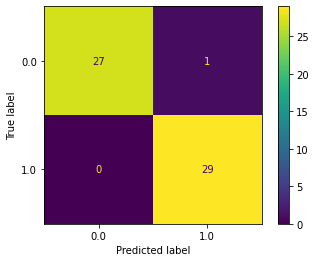

In [48]:
#show confusion matrix for testset
# indépendamment du score, les erreurs de diagnostics du type false negative sont particulièrement mauvaises
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(modeltreegrid, x_test, y_test)  
plt.show() 

[ 40  58  76  94 112 130 148 166 184 202]


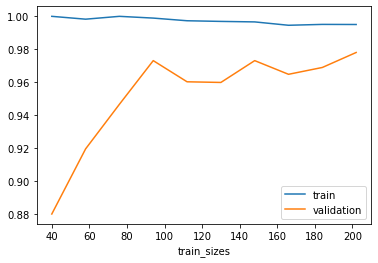

In [63]:
# le learning rate va nous permettre de voir s'il serait intéressant de récolter plus de données
# si nos courbes tendent vers une valeur fixe alors c'est le cas
#ici la courbe continue d'augmenter, + de données donnerait alors un modèle plus performant

from sklearn.model_selection import learning_curve

N, train_score_lc, val_score_lc = learning_curve(modeltreegrid, x_train, y_train, train_sizes=np.linspace(0.2, 1.0, 10), cv=10)

print(N)
plt.plot(N,train_score_lc.mean(axis=1), label='train')
plt.plot(N,val_score_lc.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()